1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.  
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?
7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [4]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [5]:
def calc_logloss(y, y_pred):
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [6]:
def sigmoid(z):
  res = 1 / (1 + np.exp(-z))
  return res

In [7]:
z = np.linspace(-10, 10, 101)
z

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

In [8]:
probabilities = sigmoid(z)
probabilities

array([4.53978687e-05, 5.54485247e-05, 6.77241496e-05, 8.27172229e-05,
       1.01029194e-04, 1.23394576e-04, 1.50710358e-04, 1.84071905e-04,
       2.24816770e-04, 2.74578156e-04, 3.35350130e-04, 4.09567165e-04,
       5.00201107e-04, 6.10879359e-04, 7.46028834e-04, 9.11051194e-04,
       1.11253603e-03, 1.35851995e-03, 1.65880108e-03, 2.02532039e-03,
       2.47262316e-03, 3.01841632e-03, 3.68423990e-03, 4.49627316e-03,
       5.48629890e-03, 6.69285092e-03, 8.16257115e-03, 9.95180187e-03,
       1.21284350e-02, 1.47740317e-02, 1.79862100e-02, 2.18812709e-02,
       2.65969936e-02, 3.22954647e-02, 3.91657228e-02, 4.74258732e-02,
       5.73241759e-02, 6.91384203e-02, 8.31726965e-02, 9.97504891e-02,
       1.19202922e-01, 1.41851065e-01, 1.67981615e-01, 1.97816111e-01,
       2.31475217e-01, 2.68941421e-01, 3.10025519e-01, 3.54343694e-01,
       4.01312340e-01, 4.50166003e-01, 5.00000000e-01, 5.49833997e-01,
       5.98687660e-01, 6.45656306e-01, 6.89974481e-01, 7.31058579e-01,
      

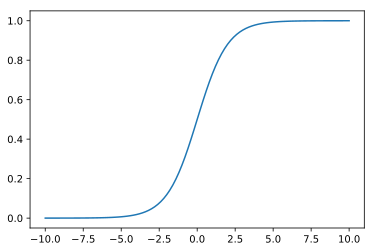

In [9]:
plt.plot(z, probabilities)

In [10]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [11]:
W = eval_model(X_st, y, iterations=29200, alpha=1e+0)

2920 [-19.87075388  -2.1837395   -4.98932264  16.45252591] 0.1838166695270073
5840 [-28.12253663  -2.91000161  -7.40658523  23.13954884] 0.14233025747855482
8760 [-33.882464    -3.41803353  -9.06861872  27.7885644 ] 0.12238792824313978
11680 [-38.37871813  -3.81061824 -10.35982815  31.40035802] 0.11032717070253346
14600 [-42.12136164  -4.13222185 -11.43443896  34.39140729] 0.1020166291020369
17520 [-45.36713988  -4.40574135 -12.36848785  36.97159773] 0.09579544096592309
20440 [-48.26226734  -4.64445245 -13.20462448  39.2606445 ] 0.09086681897226741
23360 [-50.89743324  -4.85674325 -13.96896329  41.33298377] 0.08679966361706888
26280 [-53.33248555  -5.04827408 -14.67852681  43.23792208] 0.08333956762229218
29200 [-55.60880648  -5.22306929 -15.34493679  45.00973232] 0.08032624185740181


In [12]:
W

array([-55.60880648,  -5.22306929, -15.34493679,  45.00973232])

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [13]:
def calc_pred_proba(W, X):
    y_pred_proba = 1/(1 + np.exp(np.dot(W,X)))
    return  y_pred_proba

In [14]:
calc_pred_proba(W, X_st)

array([6.87917553e-01, 9.99191528e-01, 3.16253194e-14, 9.81201095e-01,
       2.38994908e-02, 9.93701116e-01, 1.16223859e-16, 9.94765414e-01,
       3.11763631e-01, 8.62841445e-11])

Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [15]:
def calc_pred(W, X):
    y_pred = np.sign(np.dot(W,X))
    return  y_pred

In [16]:
y_pred=calc_pred(W, X_st)

In [17]:
y_pred

array([-1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.])

In [18]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [19]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(y)):
    if y[i]==1 and y_pred[i]==1:
        TP+=1
    elif y[i]==0 and y_pred[i]==-1:
        TN+=1
    elif y[i]==0 and y_pred[i]==1:
        FP+=1
    elif y[i]==1 and y_pred[i]==0:
        FN+=1    
    print(i, y[i], y_pred[i], TP, TN, FP, FN )

0 0.0 -1.0 0 1 0 0
1 0.0 -1.0 0 2 0 0
2 1.0 1.0 1 2 0 0
3 0.0 -1.0 1 3 0 0
4 1.0 1.0 2 3 0 0
5 0.0 -1.0 2 4 0 0
6 1.0 1.0 3 4 0 0
7 0.0 -1.0 3 5 0 0
8 1.0 1.0 4 5 0 0
9 1.0 1.0 5 5 0 0


In [20]:
matrix=[[TP,  FP],[ FN,  TN]]
for line in matrix:
    print(line)

[5, 0]
[0, 5]


In [21]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Accuracy

1.0

In [22]:
precision = TP/(TP+FP)
precision


1.0

In [23]:
recall = TP/(TP+FN)
recall

1.0

In [24]:
F = 2*precision*recall /( precision + recall)
F

1.0

Намой взгляд модель переобучилась потому что точность и полнота равна единице

Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

In [25]:
def eval_model_l2(X, y, iterations, alpha=1e-4, lambda_=1e-4 ):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T)+ lambda_ * W)
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [26]:
W = eval_model_l2(X_st, y, iterations=29000, alpha=1e-0,lambda_=1e-9)

2900 [-19.79962851  -2.17753275  -4.96821543  16.39481473] 0.18426029130043883
5800 [-28.03056425  -2.90187364  -7.37992157  23.06515837] 0.14269926233264624
8700 [-33.77914956  -3.40895644  -9.03891089  27.7053723 ] 0.12269688705528818
11600 [-38.26692454  -3.80092805 -10.32774364  31.31078204] 0.11059725929607618
14500 [-42.00218369  -4.12207464 -11.4001918   34.29641085] 0.10226109788747695
17400 [-45.24105653  -4.3952259  -12.33214669  36.87163317] 0.0960224620541952
20300 [-48.12950462  -4.63362621 -13.16620493  39.15594869] 0.09108165060676408
23200 [-50.75810413  -4.84564604 -13.92846228  41.22369099] 0.08700583953307492
26100 [-53.1866524   -5.03693386 -14.63593743  43.12411384] 0.08353954954855658
29000 [-55.45651187  -5.21150502 -15.30025524  44.89146195] 0.08052179246986133


In [27]:
def eval_model_l1(X, y, iterations, alpha=1e-4, lambda_=1e-4 ):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T)+ lambda_* np.sign(W))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [28]:
W = eval_model_l1(X_st, y, iterations=29000, alpha=1e-0,lambda_=1e-9)

2900 [-19.79965461  -2.17753505  -4.96822315  16.39483594] 0.1842601282467205
5800 [-28.03063682  -2.90188008  -7.37994257  23.06521712] 0.14269897051080213
8700 [-33.77928016  -3.40896795  -9.03894839  27.70547754] 0.1226964955161017
11600 [-38.26712278  -3.80094528 -10.32780046  31.310941  ] 0.1105967791352734
14500 [-42.00245812  -4.12209809 -11.40027057  34.29662977] 0.1022605335055928
17400 [-45.24141504  -4.39525592 -12.33224989  36.87191765] 0.0960218149012725
20300 [-48.1299546   -4.63366307 -13.16633497  39.15630387] 0.09108092065671752
23200 [-50.75865257  -4.84568994 -13.92862147  41.22412165] 0.08700502597532814
26100 [-53.18730595  -5.03698497 -14.636128    43.12462447] 0.08353865116167988
29000 [-55.45727688  -5.21156348 -15.30047932  44.89205678] 0.08052080784705418


In [29]:
W

array([-55.45727688,  -5.21156348, -15.30047932,  44.89205678])

Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [30]:
def calc_logloss_2(y, y_pred):
   # Здесь я добавил строку которая заменяет близкие к единице занчения y_pred на значение  0.9999999 
  y_pred=np.where(y_pred<0.9999999 , y_pred, y_pred- 1e-10)
    # насколько это верное решение  и к каким последвиям это может привести я пока не разобрался
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
  return err

In [31]:
def eval_model(X, y, iterations, alpha=1e-4):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss_2(y, y_pred)
    W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
      print(i, W, err)
  return W

In [32]:
W = eval_model(X_st, y, iterations=140200, alpha=1e+0)

14020 [-41.42357228  -4.07271508 -11.23395727  33.83495809] 0.10346559806394999
28040 [-54.72141382  -5.15542444 -15.08477944  44.3200502 ] 0.08147752916601156
42060 [-64.35365163  -5.85646301 -17.93350212  51.7388001 ] 0.0702712535033352
56080 [-72.41671789  -6.39604691 -20.35348599  57.85526647] 0.06251329639350497
70100 [-79.53972369  -6.8511173  -22.50727479  63.21655669] 0.056492408003724695
84120 [-85.98972319  -7.25416653 -24.46409217  68.05373006] 0.05156790136603425
98140 [-91.90993756  -7.62039878 -26.26278292  72.48631474] 0.04742392921515363
112160 [-97.39102467  -7.95794781 -27.92906078  76.58710562] 0.04387384460554685
126180 [-102.497075     -8.27181293  -29.48166403   80.40612135] 0.04079375710168263
140200 [-107.27673979   -8.56543682  -30.93507707   83.98064879] 0.038095168257884435


In [33]:
np.log(0.9999999999999999)

-1.1102230246251565e-16